In [14]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [15]:
# Variables
RANDOM_STATE = 42
TEST_SIZE = 0.25
LABEL = 'Label'

feature_names = [
    'area',
    'perimeter',
    'aspect_ratio',
    'extent',
    'convex_hull_area',           # Area of the convex hull
    'hull_perimeter',              # Perimeter of the convex hull
    'solidity',                    # Ratio of area to convex hull area
    'circularity',                 # Measure of how circular the shape is
    'eccentricity',                # Measure of the elongation of the shape
    'num_convexity_defects',       # Number of convexity defects
    'max_defect_depth',            # Maximum depth of convexity defects
    'major_axis_length',           # Length of the major axis of the fitted ellipse
    'minor_axis_length',           # Length of the minor axis of the fitted ellipse
    'orientation',                  # Orientation angle of the fitted ellipse
    'hu_moment',
    'centroid_x',
    'centroid_y'
]

In [16]:
# Dataset
df = pd.read_csv('data/hand_gesture_features.csv')

df

,area,perimeter,aspect_ratio,extent,convex_hull_area,hull_perimeter,solidity,circularity,eccentricity,num_convexity_defects,max_defect_depth,major_axis_length,minor_axis_length,orientation,hu_moment,centroid_x,centroid_y,Label
0,1648058.5,8093.260218,0.5625,0.794781,2070601.0,5996.000000,0.795932,0.316181,0.734203,1.0,794.000000,1079.496948,732.902710,168.127701,0.557322,500.0,890.0,r
1,1644666.5,8909.240010,0.5625,0.793145,2070601.0,5996.000000,0.794294,0.260379,0.367252,1.0,812.000000,859.561829,799.496765,82.958221,0.537207,505.0,923.0,r
2,1609506.5,8828.362810,0.5625,0.776189,2070601.0,5996.000000,0.777314,0.259503,0.578442,1.0,820.000000,923.334045,753.185059,29.634674,0.515324,506.0,949.0,r
3,1571280.0,9851.722328,0.5625,0.757755,2044269.5,5870.884053,0.768627,0.203441,0.844529,3.0,1143.773438,1192.462769,638.575562,160.150726,0.569391,506.0,836.0,r
4,1597745.5,8591.873357,0.5625,0.770518,2070601.0,5996.000000,0.771634,0.271983,0.909042,1.0,1123.000000,1344.268066,560.163574,0.536115,0.563555,537.0,847.0,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,1647825.0,10864.951022,0.5625,0.794669,2070601.0,5996.000000,0.795820,0.175414,0.850860,2.0,916.000000,1225.891602,644.073914,27.790646,0.580812,576.0,875.0,s
129,1579597.0,10155.604572,0.5625,0.761766,2067969.0,5982.260559,0.763840,0.192462,0.924220,1.0,1455.285156,1483.280762,566.407532,17.222322,0.571977,573.0,849.0,s
130,1697241.5,10157.142469,0.5625,0.818500,2070601.0,5996.000000,0.819685,0.206733,0.932305,1.0,1360.000000,1389.688965,502.611481,177.139572,0.598209,539.0,878.0,s
131,1818315.5,13756.619185,0.5625,0.876888,2070601.0,5996.000000,0.878158,0.120741,0.553165,1.0,948.000000,830.169556,691.590820,78.064240,0.609793,554.0,953.0,s


In [17]:
# Find all records with missing values
nan_records = df[df.isna().any(axis=1)]

nan_records

,area,perimeter,aspect_ratio,extent,convex_hull_area,hull_perimeter,solidity,circularity,eccentricity,num_convexity_defects,max_defect_depth,major_axis_length,minor_axis_length,orientation,hu_moment,centroid_x,centroid_y,Label


In [18]:
# Split dataset
train_X, test_X, train_y, test_y = train_test_split(df.drop(LABEL, axis=1), df[LABEL], test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [19]:
# Functions

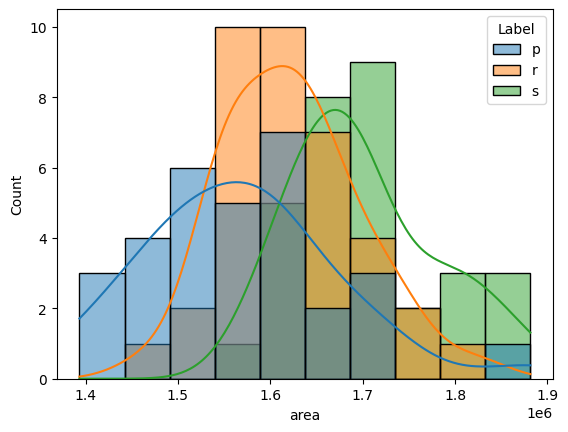

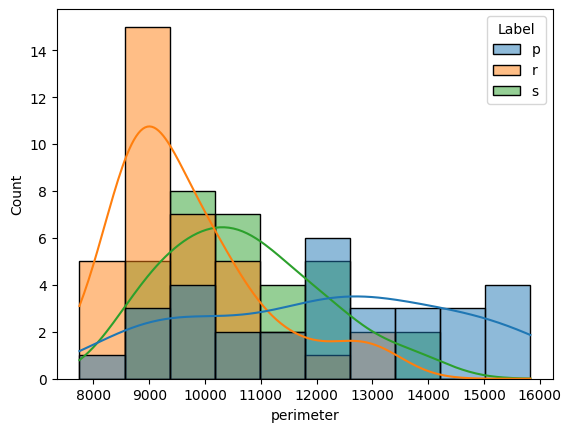

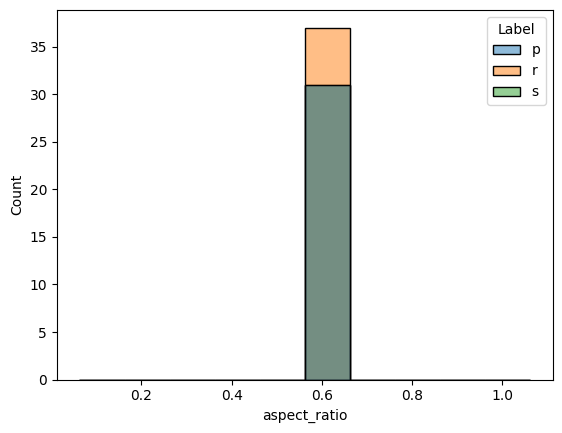

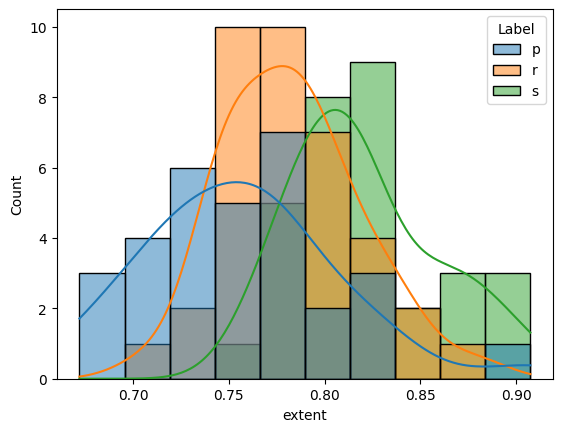

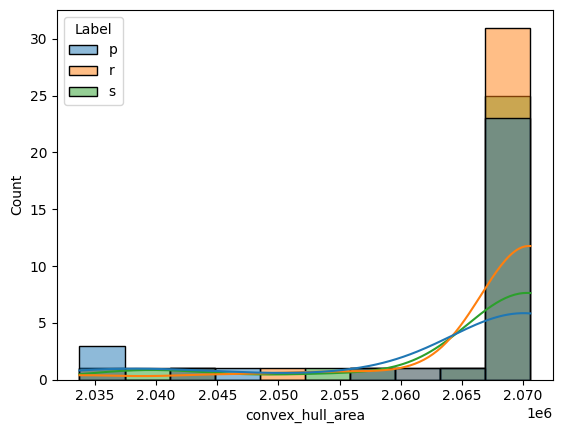

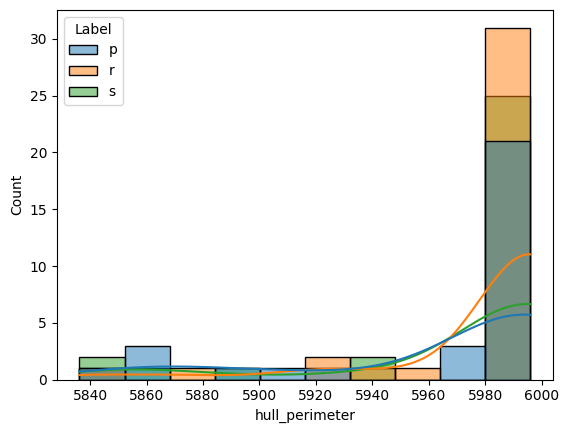

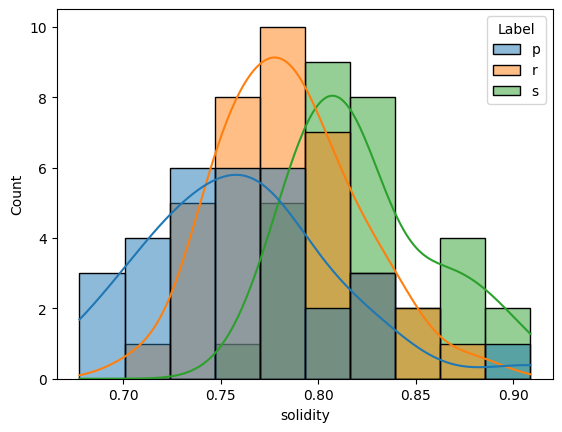

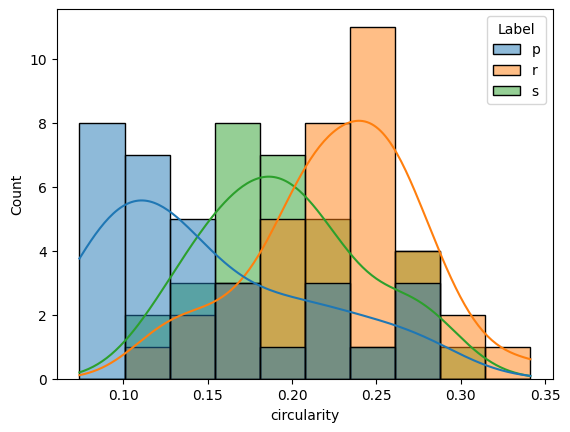

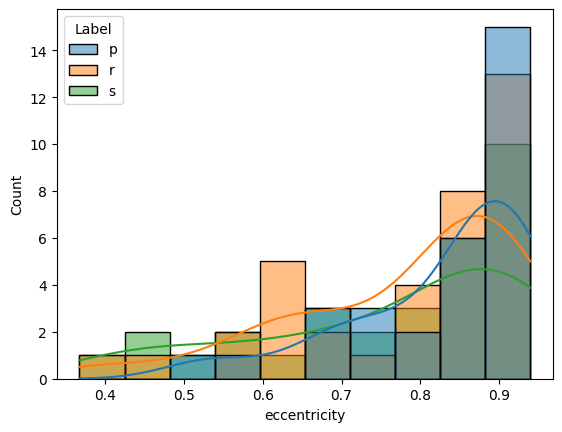

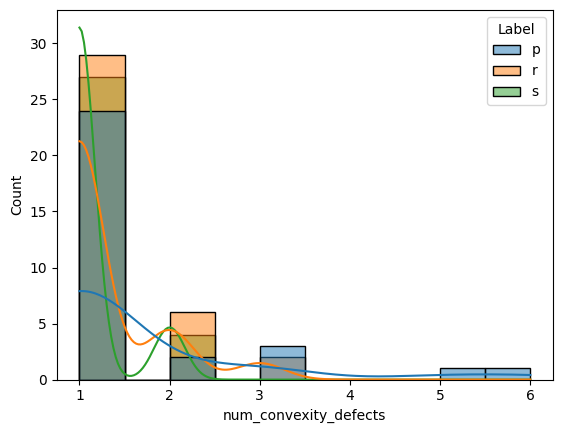

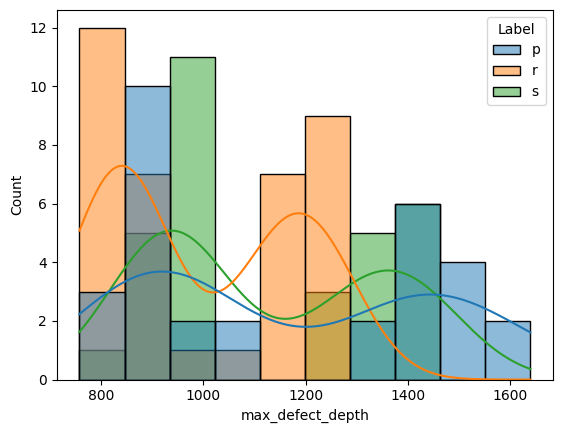

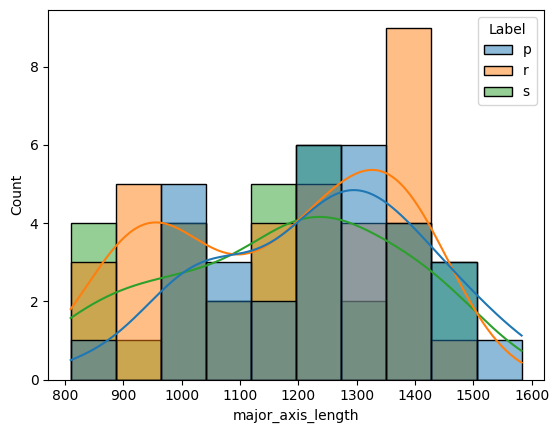

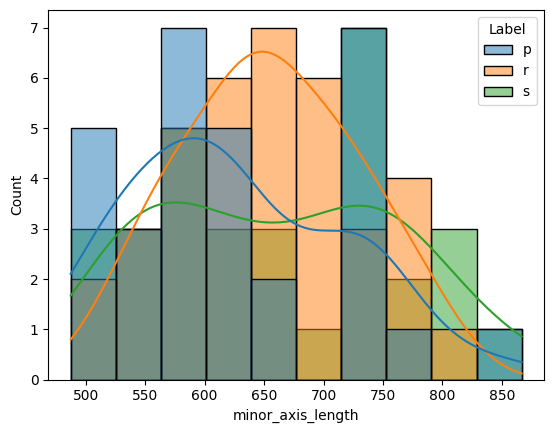

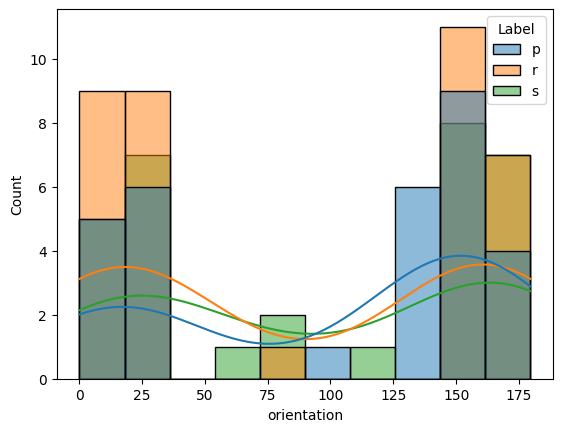

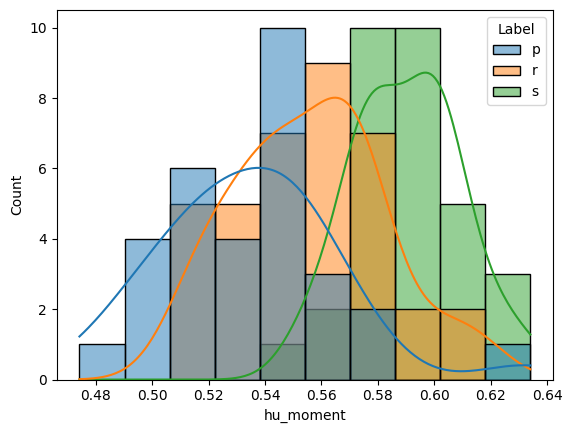

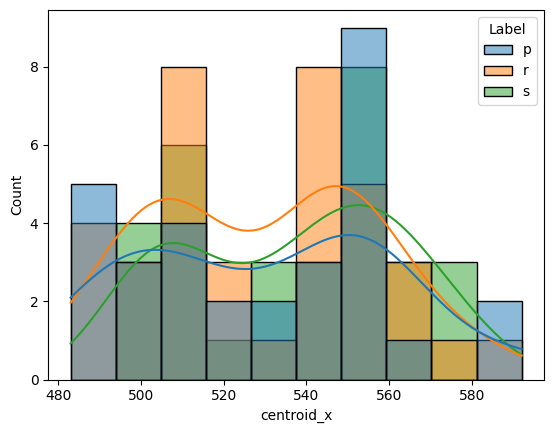

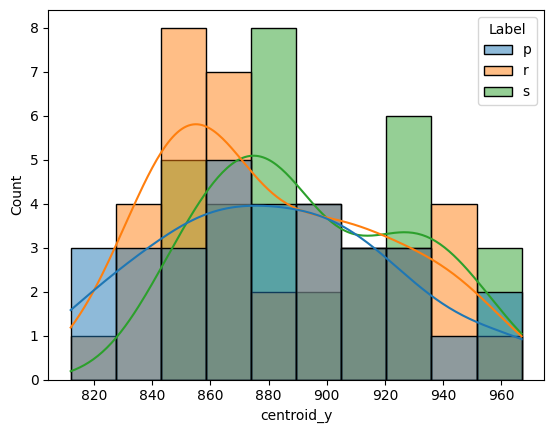

In [20]:
# Histograms
for feature in feature_names:
    sns.histplot(train_X, x=feature, hue=train_y, kde=True, bins=10)
    plt.show()

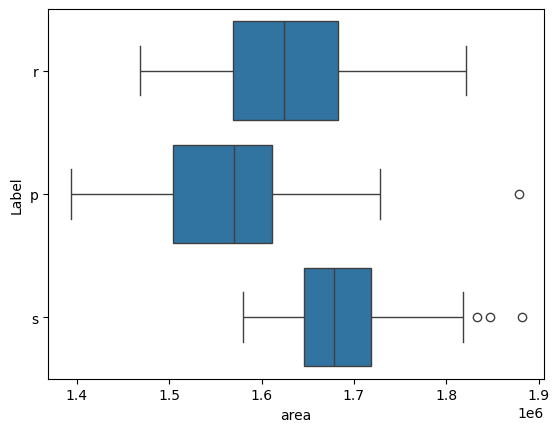

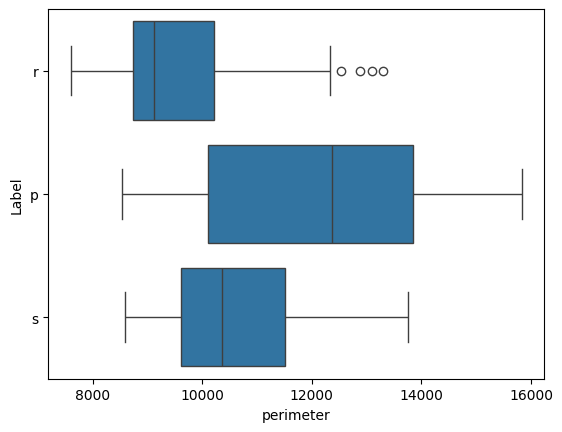

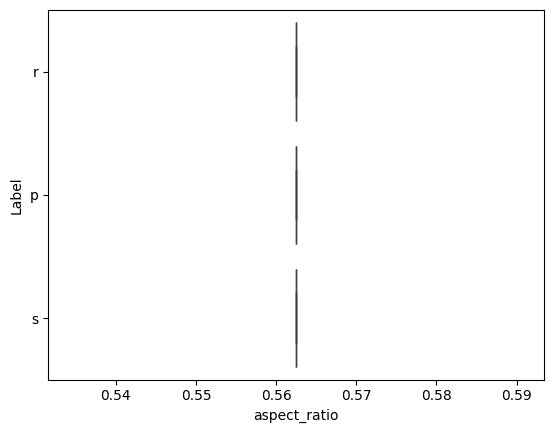

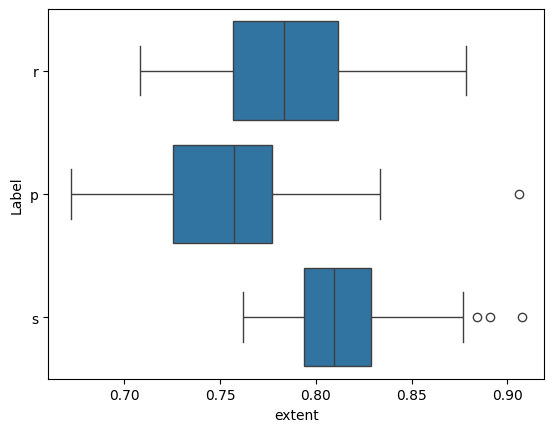

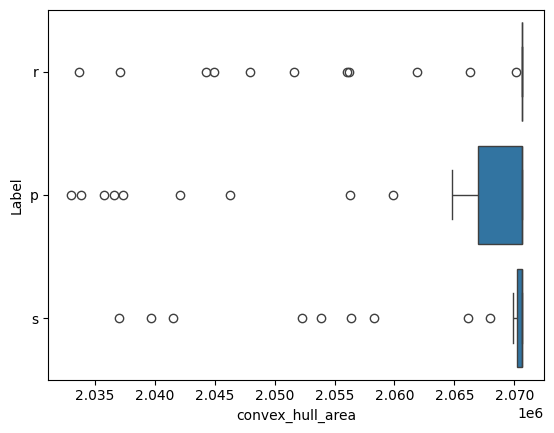

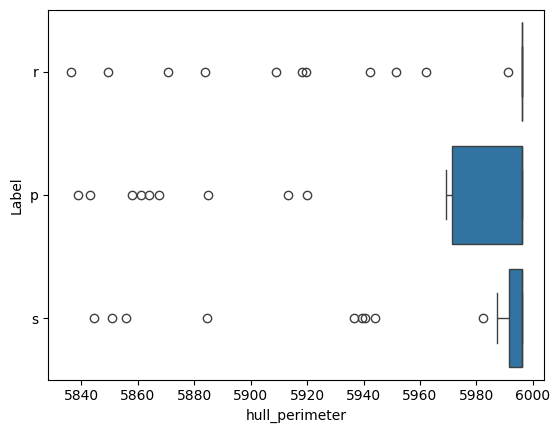

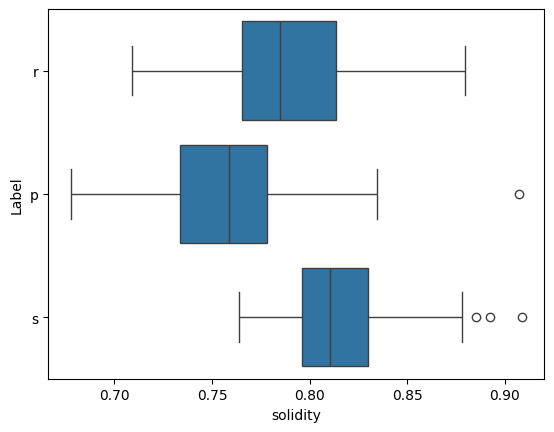

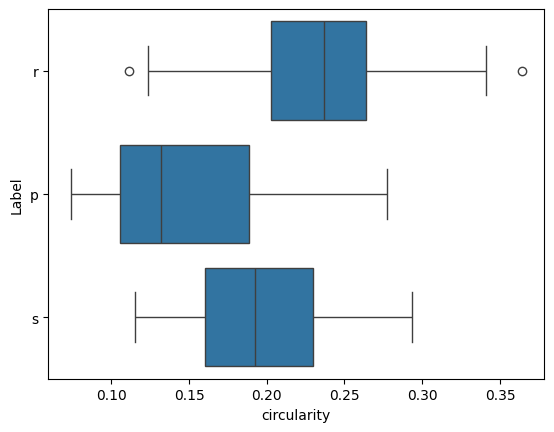

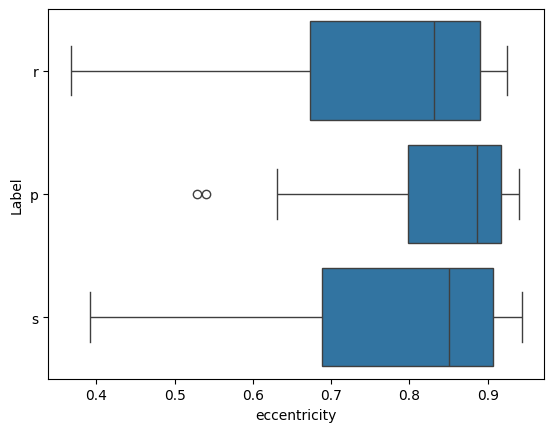

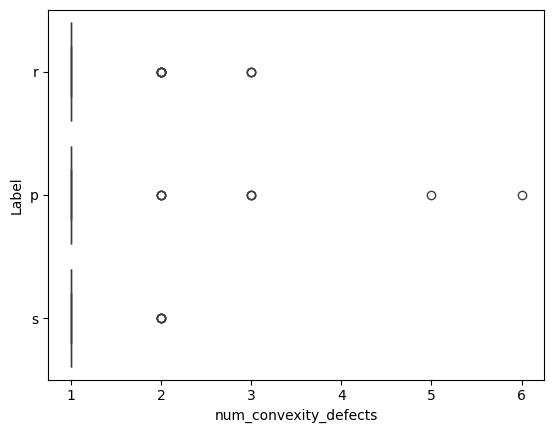

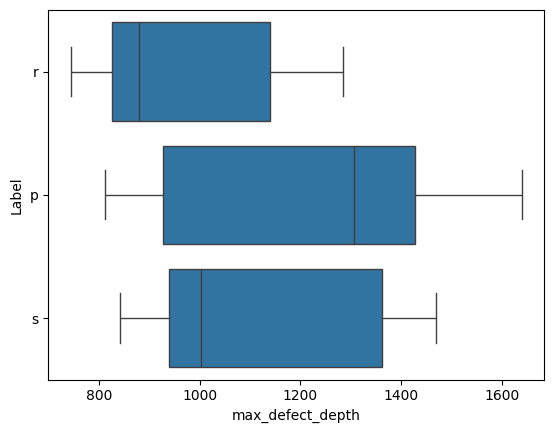

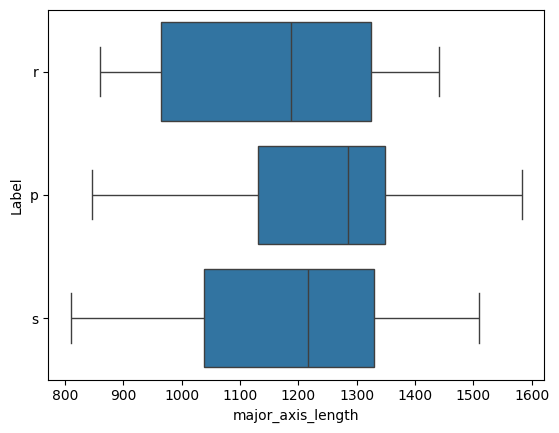

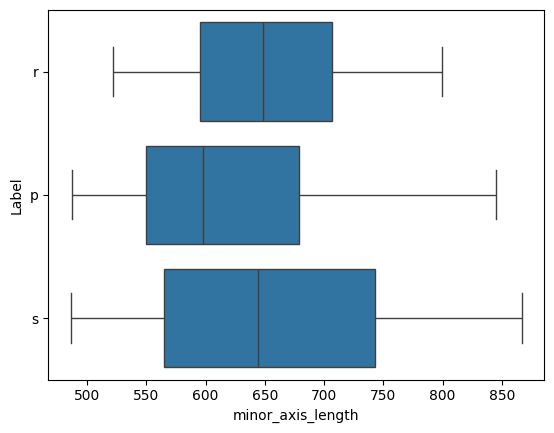

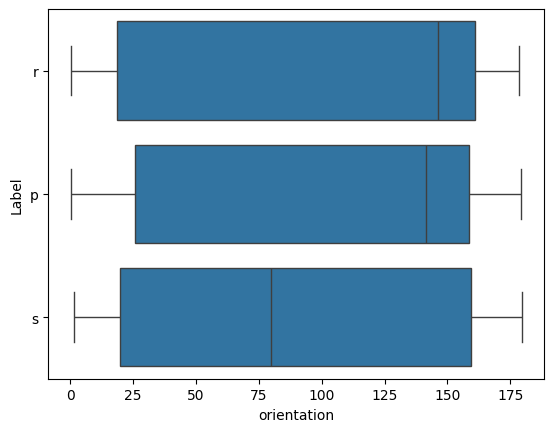

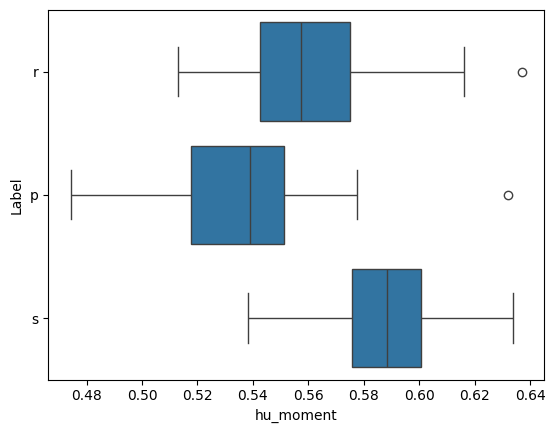

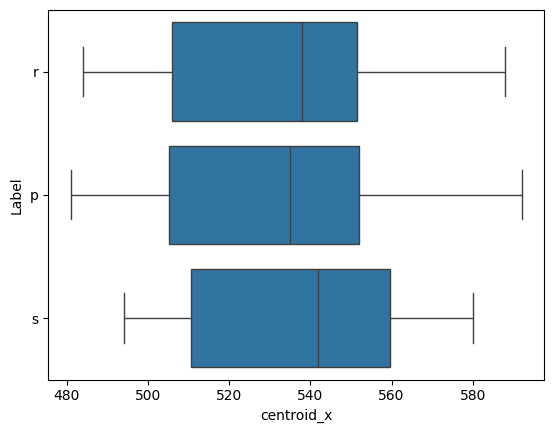

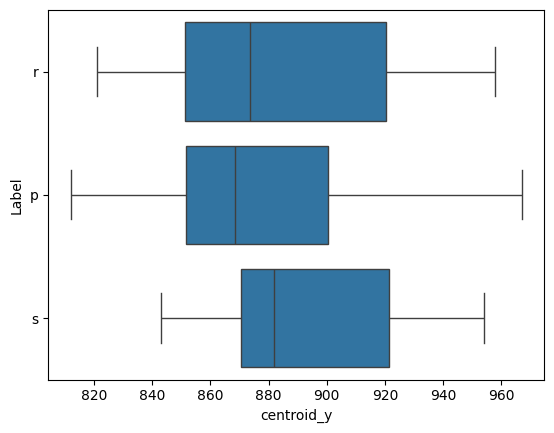

In [21]:
# Boxplots
# Create boxplots for each feature but with the 3 labels separate
for feature in feature_names:
    sns.boxplot(y=LABEL, x=feature, data=df)
    plt.show()

Area, perimeter, extent, solidity, circularity en hu_moment lijken interessante features om mee te nemen aan de hand van de boxplot. Verder onderzoeken of ze onderling sterke positieve correlaties hebben want er zijn er wel een paar zo op het oog, dit kan potentieel betekenen dat sommige al bestaan in andere door sterke positieve correlaties.

In [22]:
# Correlation matrix
# Calculate the correlation coefficient
corr = train_X.corr()
corr


,area,perimeter,aspect_ratio,extent,convex_hull_area,hull_perimeter,solidity,circularity,eccentricity,num_convexity_defects,max_defect_depth,major_axis_length,minor_axis_length,orientation,hu_moment,centroid_x,centroid_y
area,1.000000,-0.006478,NaN,1.000000,0.350625,0.331349,0.997374,0.104122,-0.574214,-0.299951,-0.471872,-0.649383,0.368265,-0.287367,0.847702,0.315399,0.725739
perimeter,-0.006478,1.000000,NaN,-0.006478,0.100859,0.032629,-0.014734,-0.961341,0.232105,0.233490,0.361690,0.184381,-0.432143,-0.419930,0.024015,0.645038,0.001445
aspect_ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
extent,1.000000,-0.006478,NaN,1.000000,0.350625,0.331349,0.997374,0.104122,-0.574214,-0.299951,-0.471872,-0.649383,0.368265,-0.287367,0.847702,0.315399,0.725739
convex_hull_area,0.350625,0.100859,NaN,0.350625,1.000000,0.979181,0.281968,-0.010958,-0.212996,-0.409340,-0.195024,-0.179597,0.066150,-0.302666,0.086892,0.362486,0.436867
hull_perimeter,0.331349,0.032629,NaN,0.331349,0.979181,1.000000,0.263522,0.050368,-0.237062,-0.478075,-0.228756,-0.192636,0.106336,-0.261841,0.041742,0.282453,0.444580
solidity,0.997374,-0.014734,NaN,0.997374,0.281968,0.263522,1.000000,0.107905,-0.571079,-0.275883,-0.468004,-0.650810,0.371451,-0.270842,0.862260,0.294997,0.709298
circularity,0.104122,-0.961341,NaN,0.104122,-0.010958,0.050368,0.107905,1.000000,-0.326196,-0.273646,-0.453789,-0.281059,0.497366,0.367504,0.008478,-0.618472,0.147256
eccentricity,-0.574214,0.232105,NaN,-0.574214,-0.212996,-0.237062,-0.571079,-0.326196,1.000000,0.203384,0.633473,0.914425,-0.862641,0.053821,-0.220476,0.106551,-0.745919
num_convexity_defects,-0.299951,0.233490,NaN,-0.299951,-0.409340,-0.478075,-0.275883,-0.273646,0.203384,1.000000,0.203871,0.209669,-0.116048,0.111859,-0.095369,0.028521,-0.371783


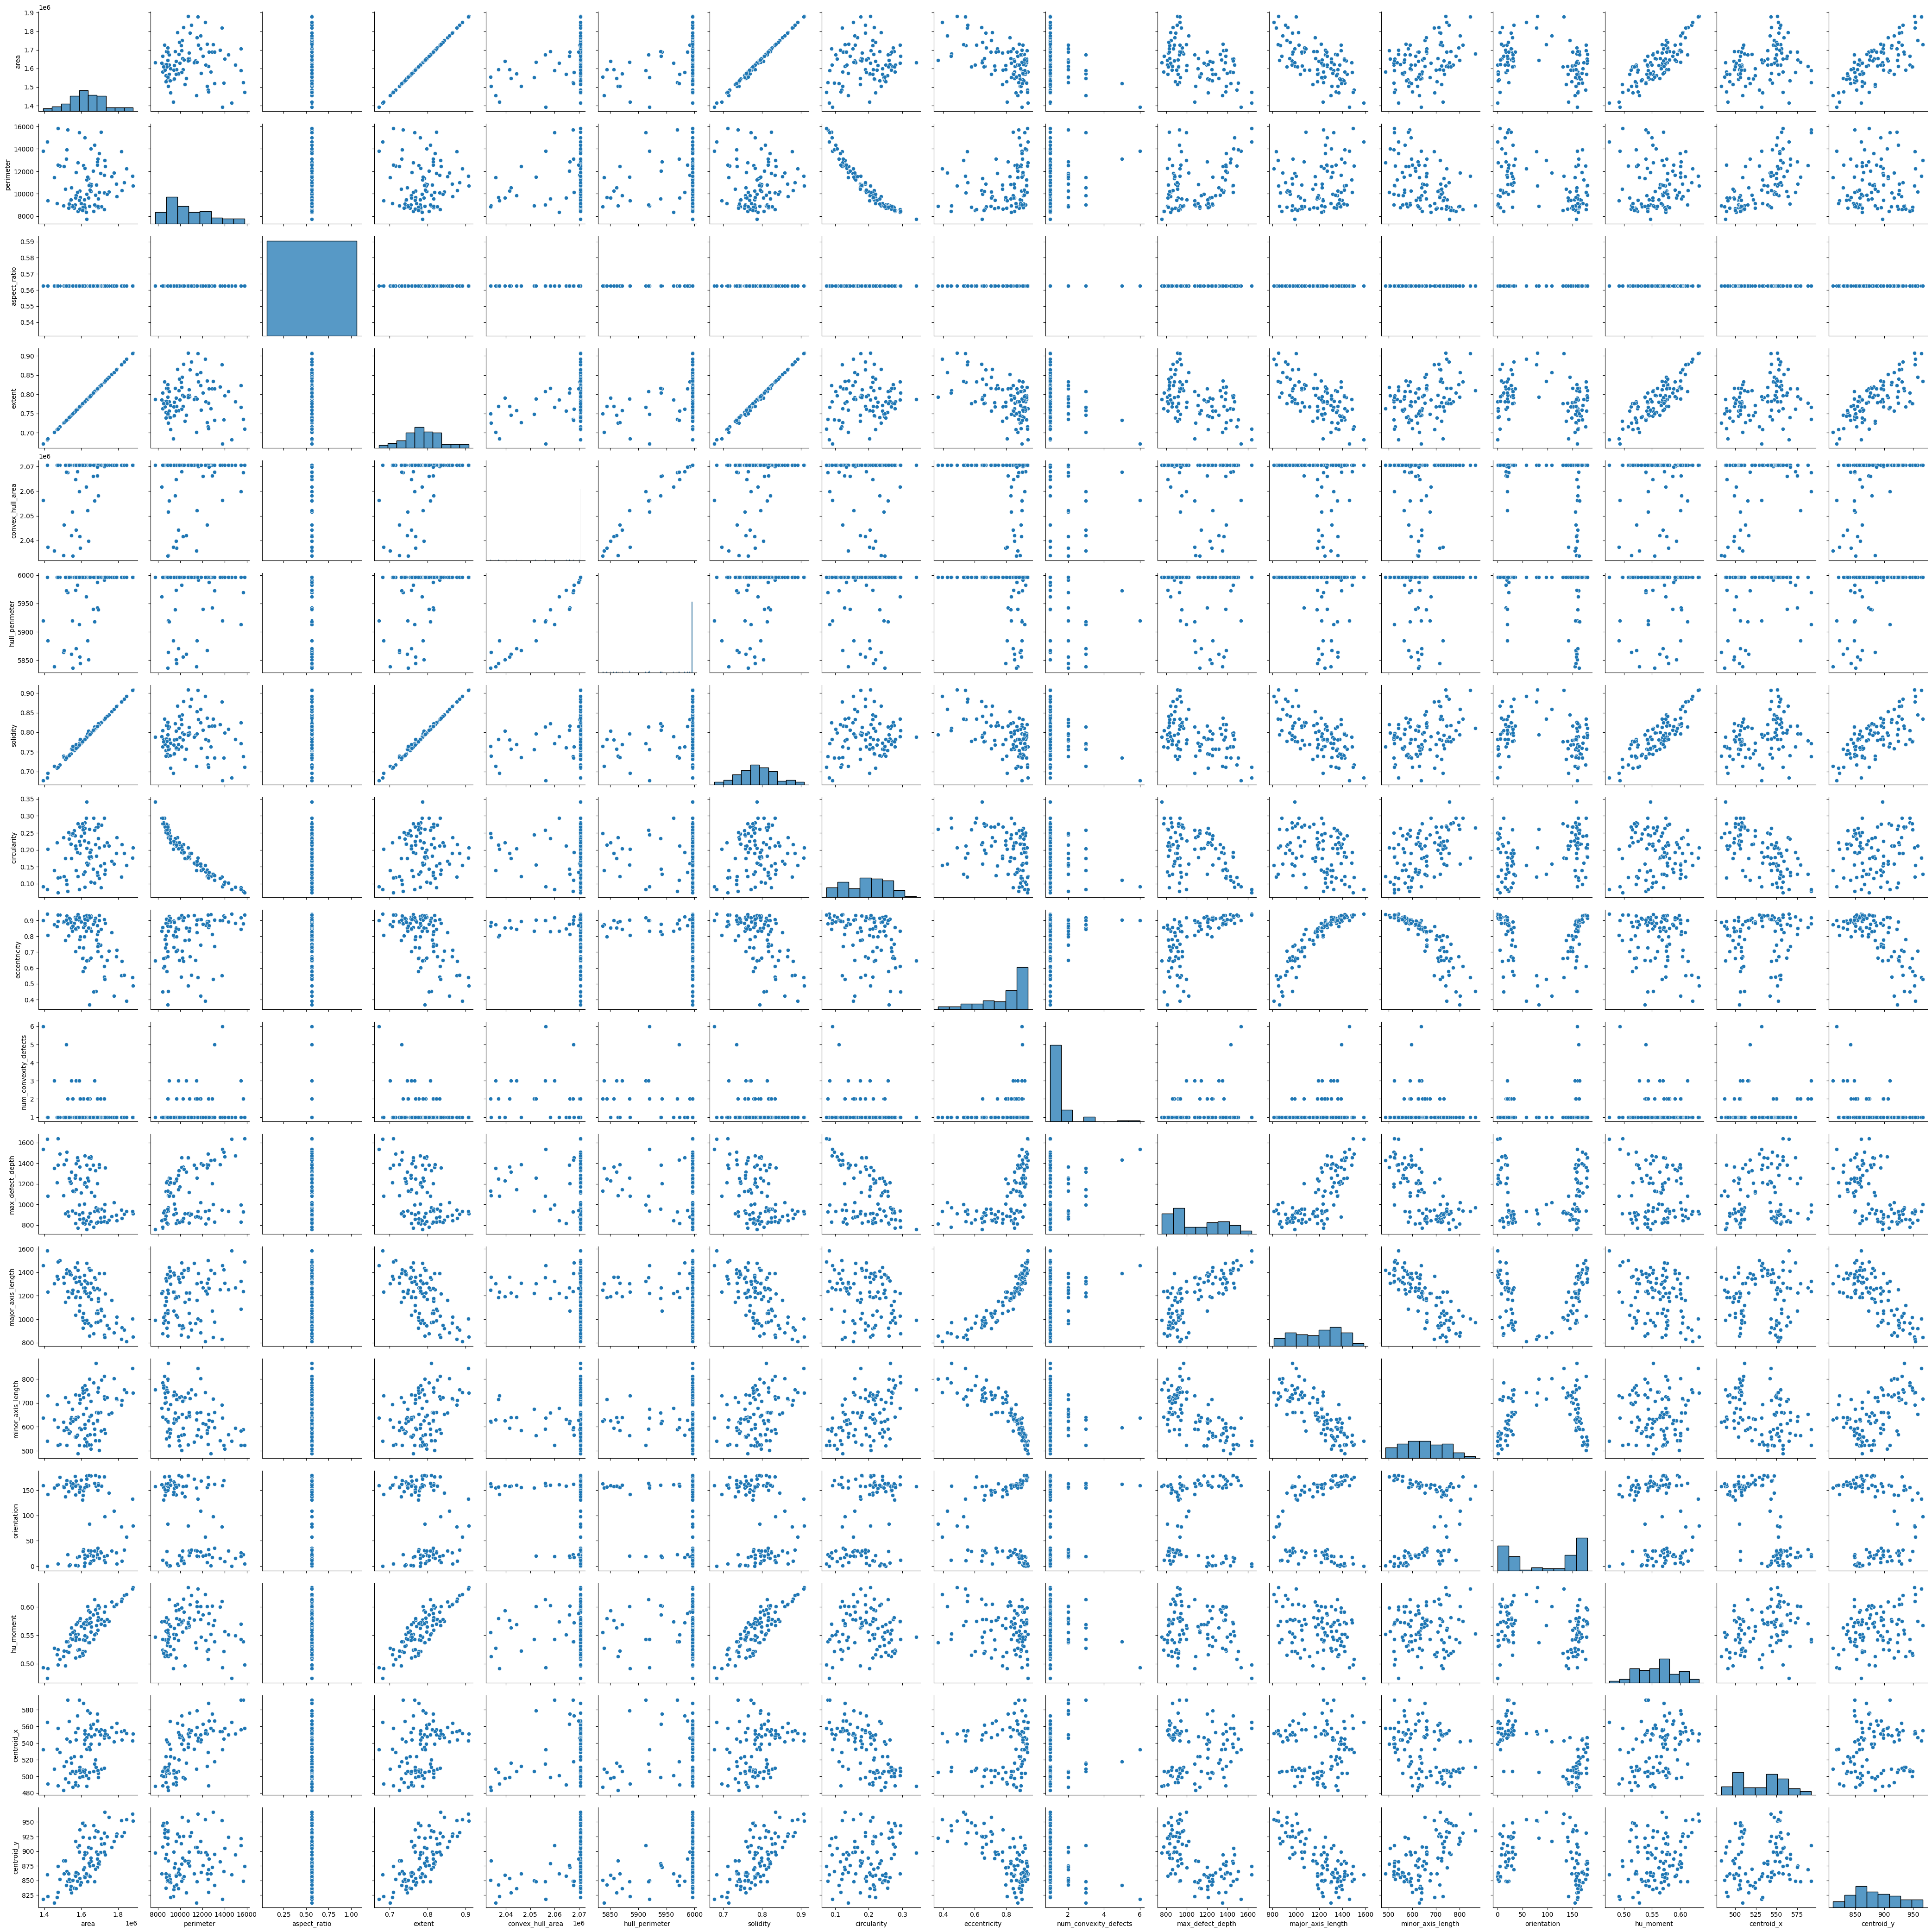

In [23]:
# Scatterplots
# Create one big pairplot with all the features paired against each other
sns.pairplot(train_X)
plt.show()
        

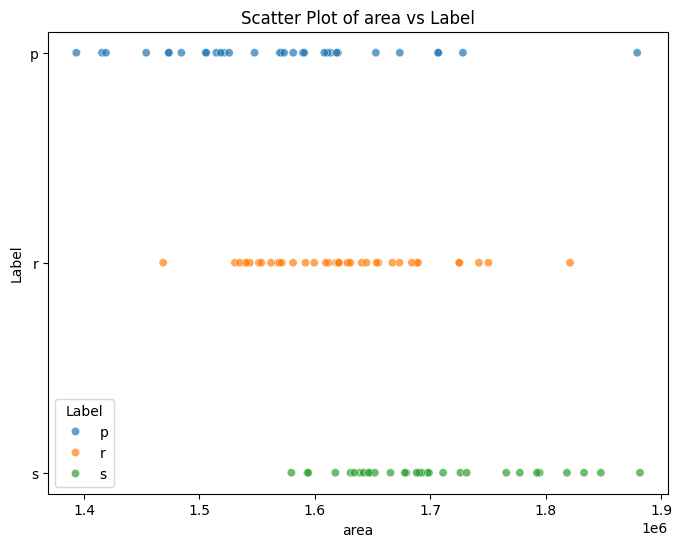

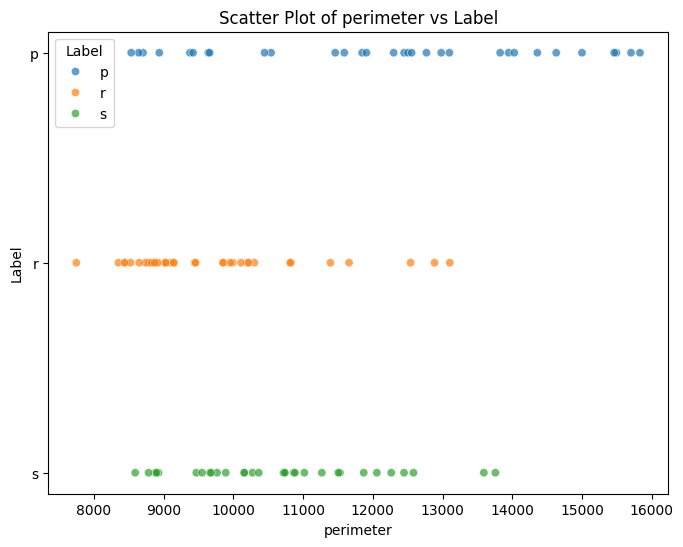

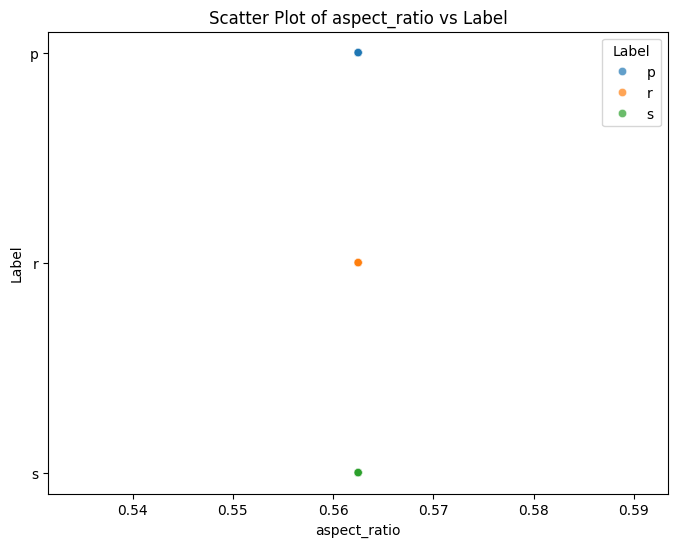

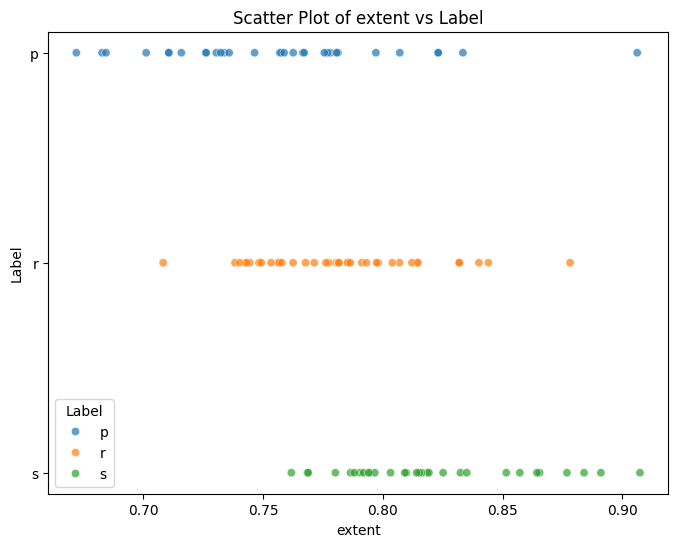

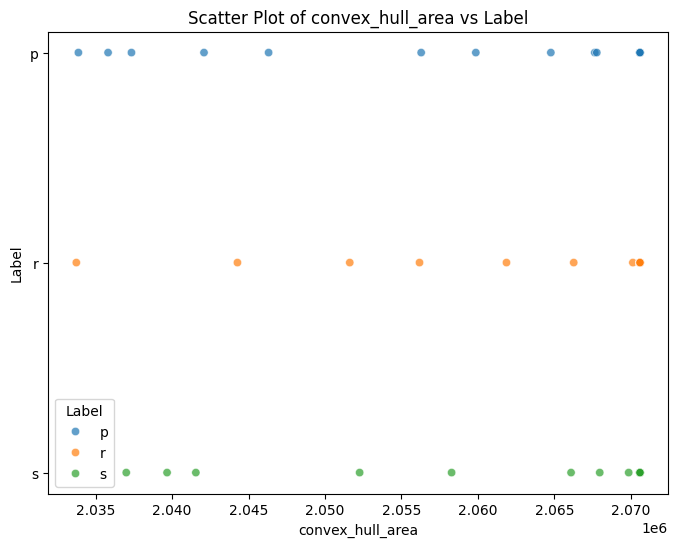

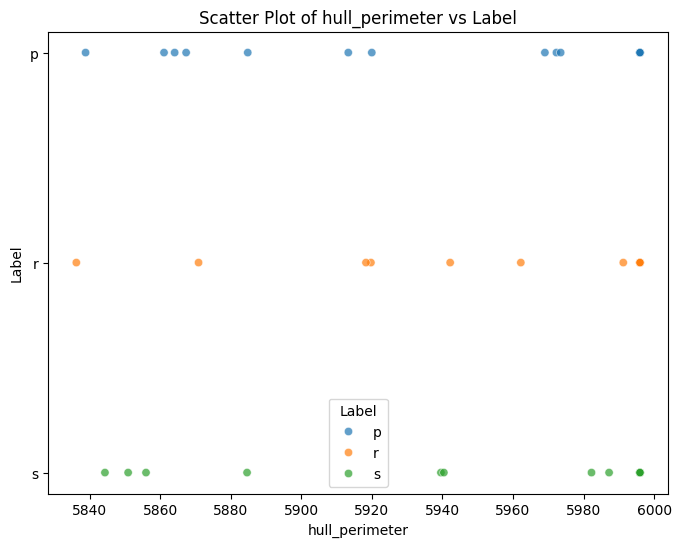

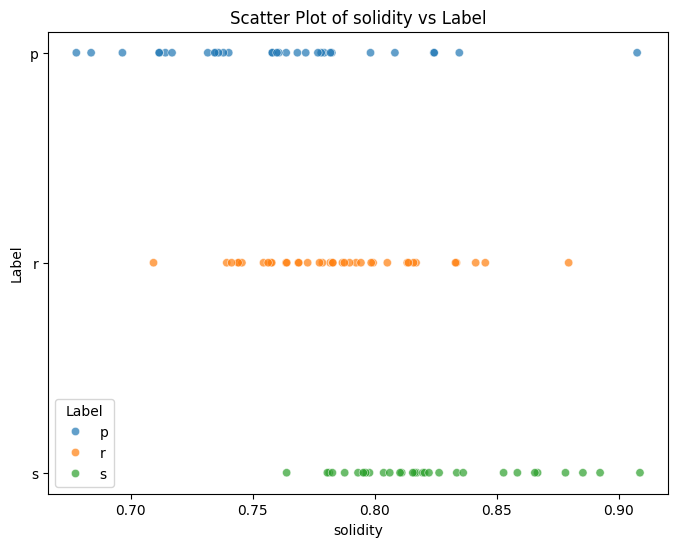

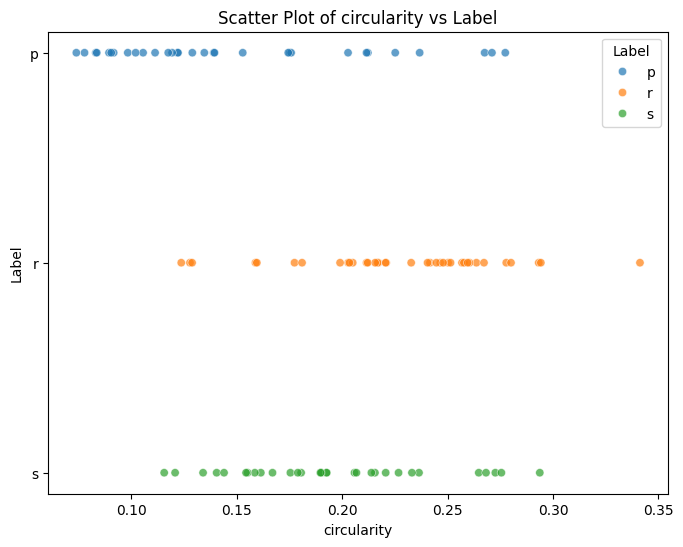

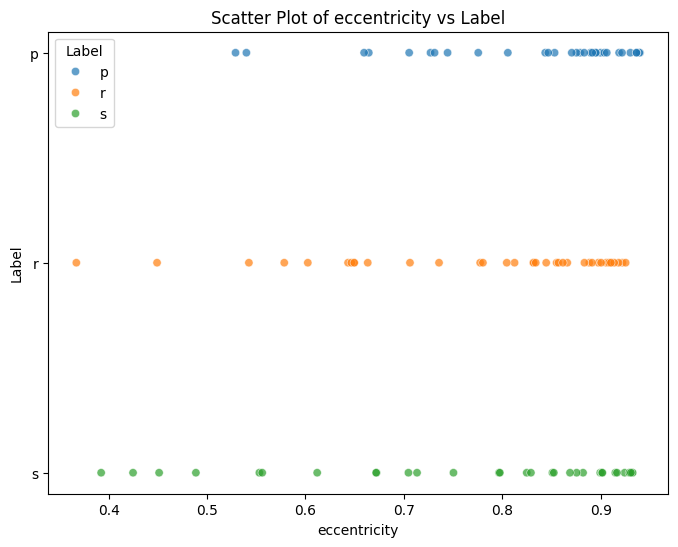

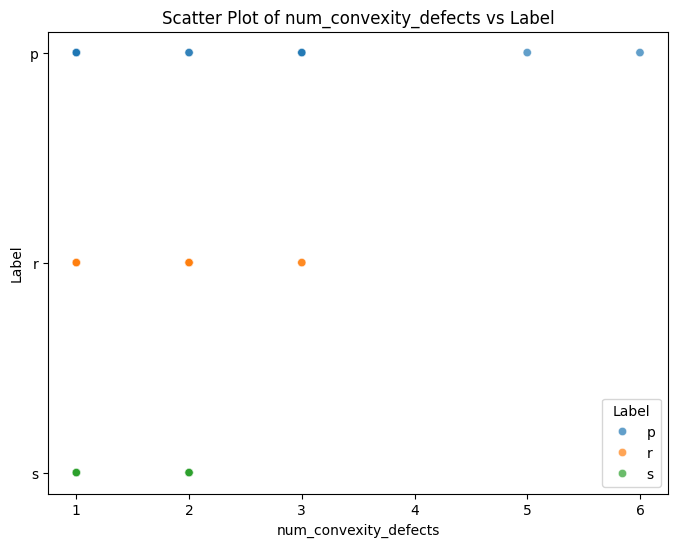

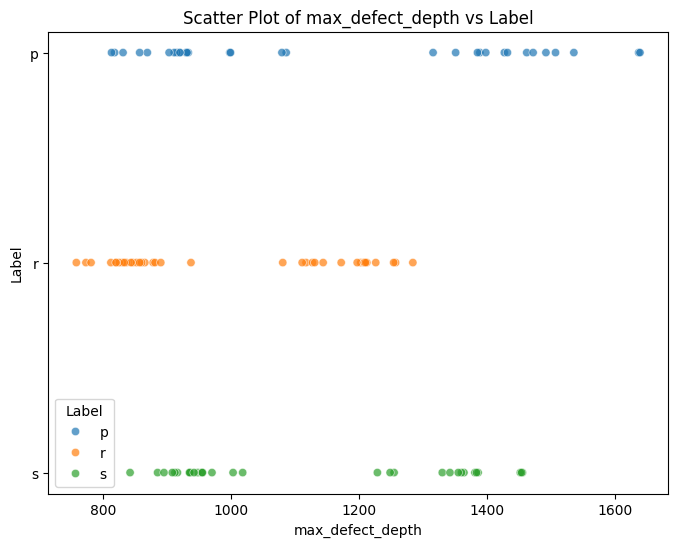

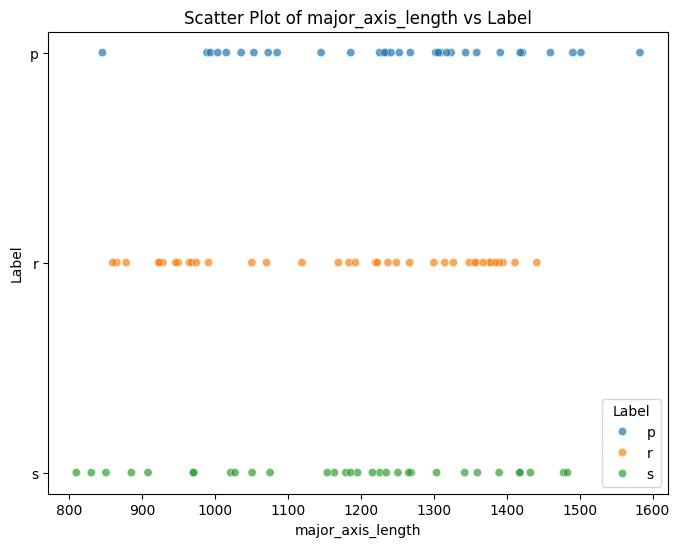

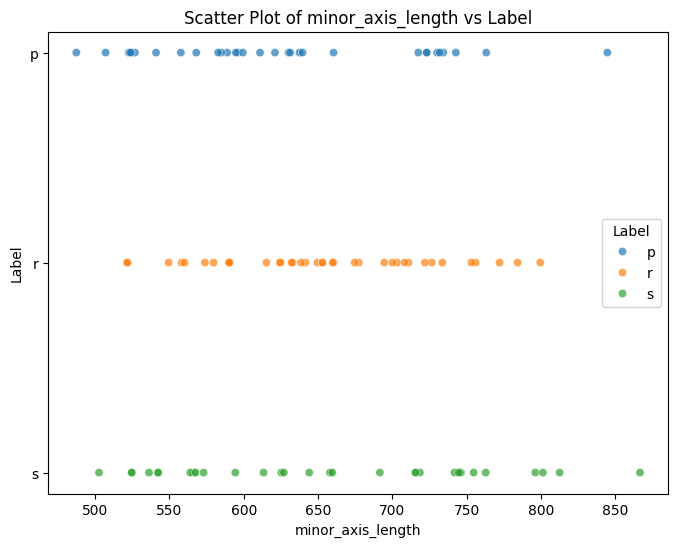

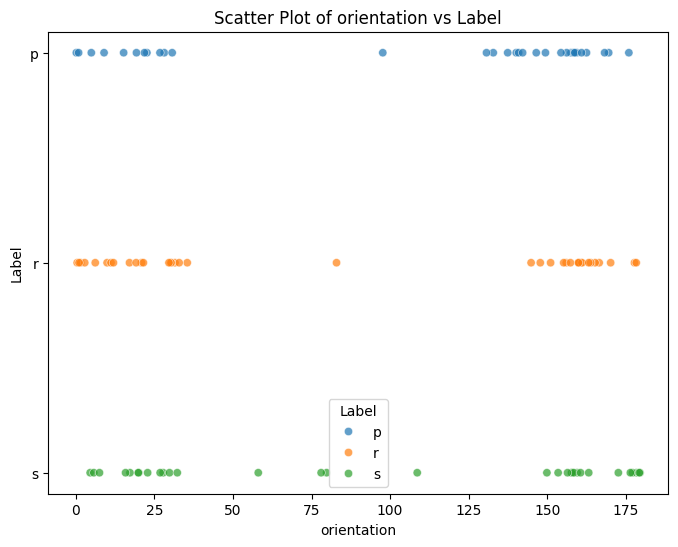

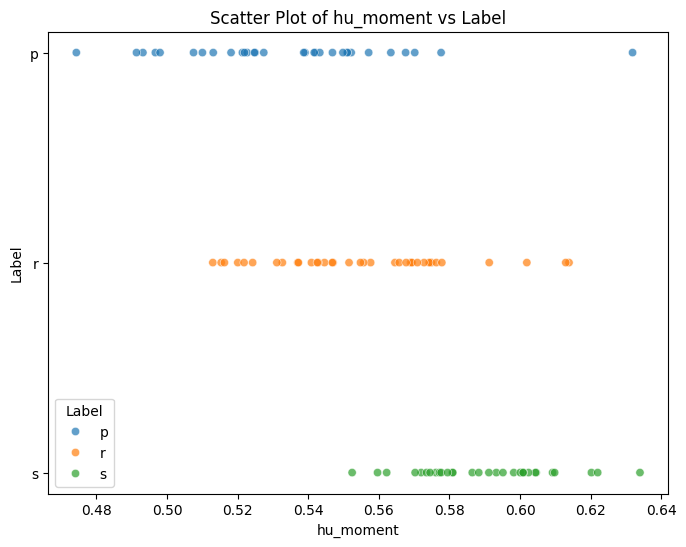

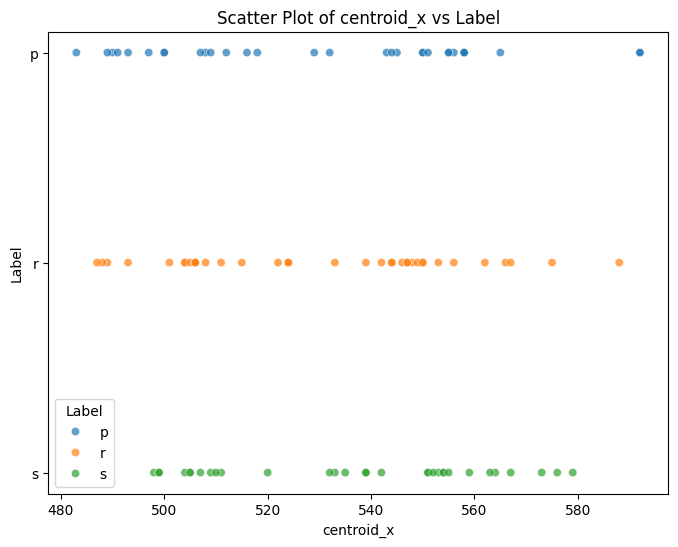

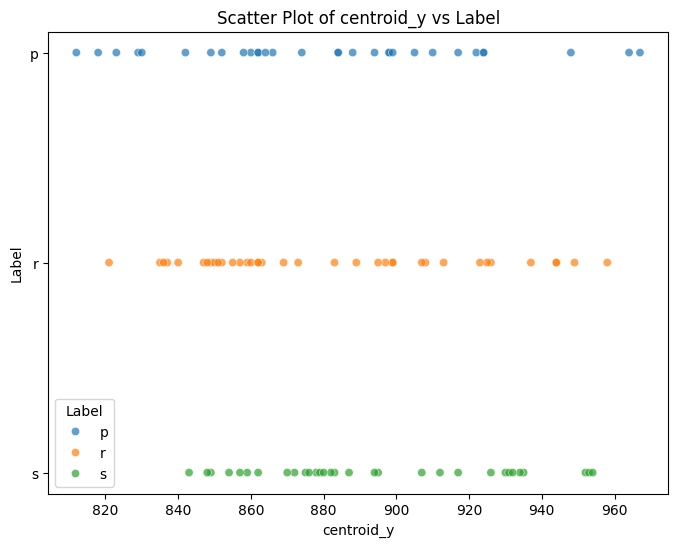

In [24]:
# Pairplot against target feature
train_data = pd.DataFrame(train_X, columns=feature_names)
train_data[LABEL] = train_y

for feature in feature_names:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=train_data, x=feature, y=LABEL, hue=LABEL, alpha=0.7)
    plt.title(f'Scatter Plot of {feature} vs {LABEL}')
    plt.xlabel(feature)
    plt.ylabel(LABEL)
    plt.legend(title=LABEL)
    plt.show()

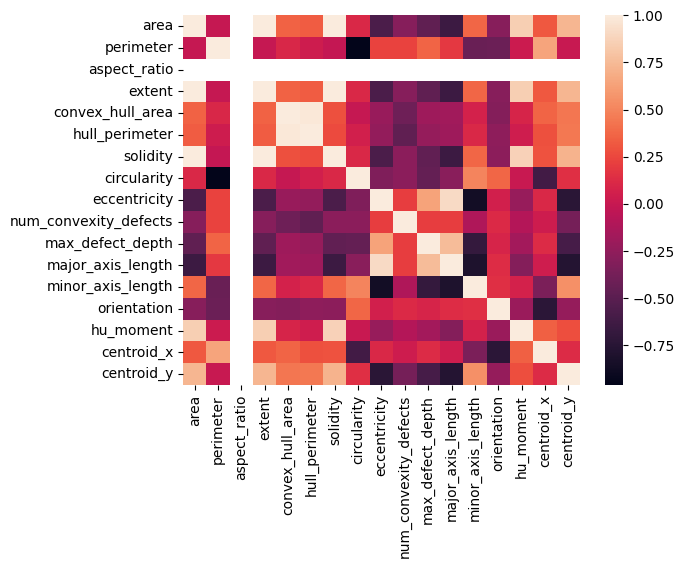

In [25]:
# Heat scatterplots
sns.heatmap(corr,annot=False)
plt.show()